In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spam7.csv')

In [5]:
df

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,n
4597,4598,14,0.000,0.353,0.00,0.00,0.00,n
4598,4599,118,0.000,0.000,0.00,0.00,0.30,n
4599,4600,78,0.000,0.000,0.00,0.00,0.96,n


In [6]:
df['spam'] = df['yesno'].apply(lambda x:1 if x=='y' else 0)
df = df.drop(['Unnamed: 0','yesno'], axis=1)

In [7]:
X = df.drop('spam', axis=1)
y = df[['spam']]

In [8]:
cols = X.columns.to_list()

In [9]:
for num,col_1 in enumerate(cols):          
    for col_2 in cols[num:]:
        if col_1 == col_2:
            continue
        else:            
            X[col_1+'_'+col_2] = X[col_1]*X[col_2]
    
    

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [9]:
boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None)

In [10]:
boost.fit(X_train, y_train)


C:\Users\vetak\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(subsample=1)

In [11]:
score = accuracy_score(y_test, boost.predict(X_test))

In [12]:
round(score,3)

0.865

In [13]:
importances = boost.feature_importances_

C:\Users\vetak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

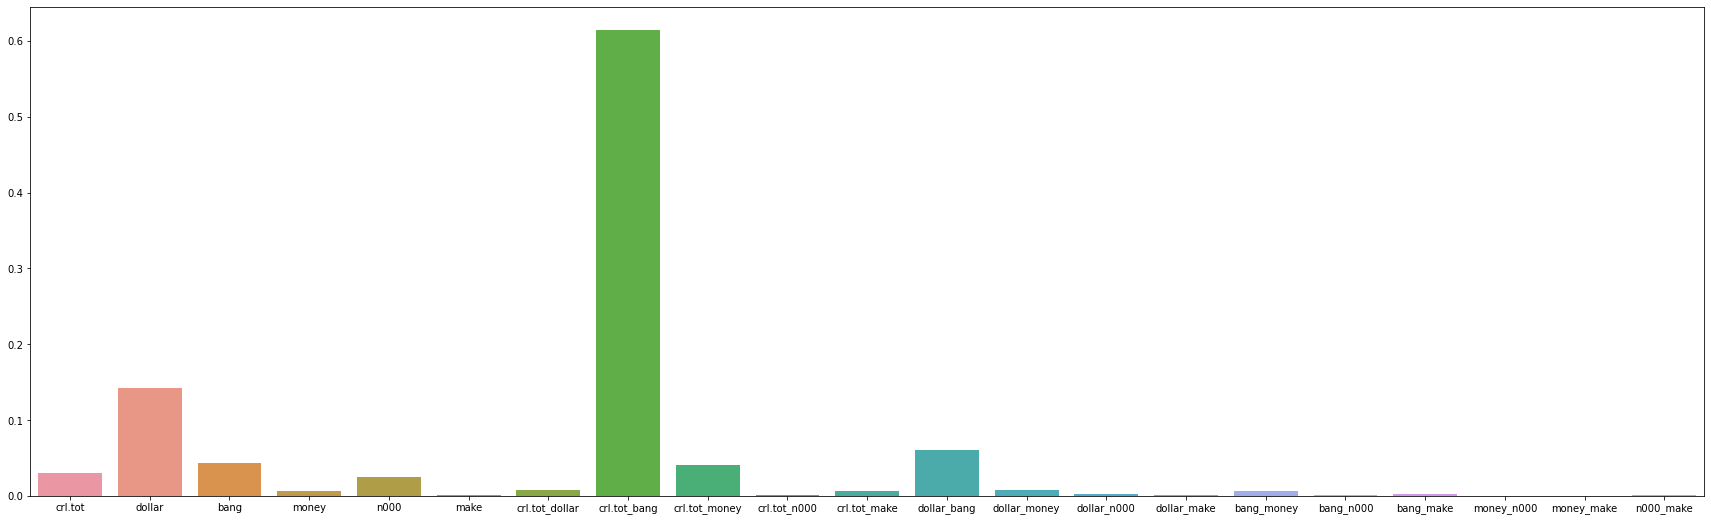

In [14]:
plt.figure(figsize=[30, 9])
sns.barplot(X.columns, importances,)

In [15]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

In [16]:
grid = GridSearchCV(estimator=boost, param_grid=param_grid,scoring='accuracy', n_jobs=-1,cv=5)

In [17]:
grid.fit(X_train, y_train)
# accuracy_score(y_test, grid.predict(X_test))

C:\Users\vetak\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(subsample=1), n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [18]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 1750}

In [19]:
param_grid = {'max_depth':[x for x in range(5,16)]}

In [20]:
grid = GridSearchCV(estimator=boost, param_grid=param_grid,scoring='accuracy', n_jobs=-1,cv=5)

In [21]:
grid.fit(X_train, y_train)

C:\Users\vetak\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(subsample=1), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

In [22]:
grid.best_params_

{'max_depth': 5}

In [23]:
X

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14,0.000,0.353,0.00,0.00,0.00,0.000,4.942,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118,0.000,0.000,0.00,0.00,0.30,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78,0.000,0.000,0.00,0.00,0.96,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [10]:
def AdaBoost_scratch(X, y, M=10, learning_rate=1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [], [], [], []
    
    # инициализация весов
    sample_weight = np.ones(N)/N
    sample_weight_list.append(sample_weight.copy())
    # цикл по длине М
    
    for m in range(M):
        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2)
        estimator.fit(X,y,sample_weight=sample_weight)
        y_predict = estimator.predict(X)
        
        # Маска для ошибок классификации
        incorrect = (y_predict != y)  
        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight*incorrect)
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log((1-estimator_error)/estimator_error)
        #Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect *((sample_weight>0) | (estimator_weight<0))) 
        
        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
    
        # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

In [11]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

<ipython-input-10-130118b05567>:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect = (y_predict != y)


ValueError: Unable to coerce to Series, length must be 1: given 4601

In [15]:
y.values.T

array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64)